In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 1: Regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, classification_report





## DATAFRAME

In [2]:
df = pd.read_csv("../data/processed/simple.csv")
df.head(1)

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Smoking_encoder,Weight_encoder
0,1,19,0,1.0,0.0,1.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stress            999 non-null    int64  
 1   Age               999 non-null    int64  
 2   Hair Loss         999 non-null    int64  
 3   Genetics_encoder  999 non-null    float64
 4   Hormones_encoder  999 non-null    float64
 5   HairCare_encoder  999 non-null    float64
 6   Smoking_encoder   999 non-null    float64
 7   Weight_encoder    999 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 62.6 KB


In [4]:
df.describe()

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Smoking_encoder,Weight_encoder
count,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000
mean,0.993994,34.188188,0.497497,0.522523,0.50951,0.492492,0.519520,0.472472
std,0.805768,9.377980,0.500244,0.499743,0.50016,0.500194,0.499869,0.499492
min,0.000000,18.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,34.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000
75%,2.000000,42.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,50.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## VISUALIZACIONES

<Axes: >

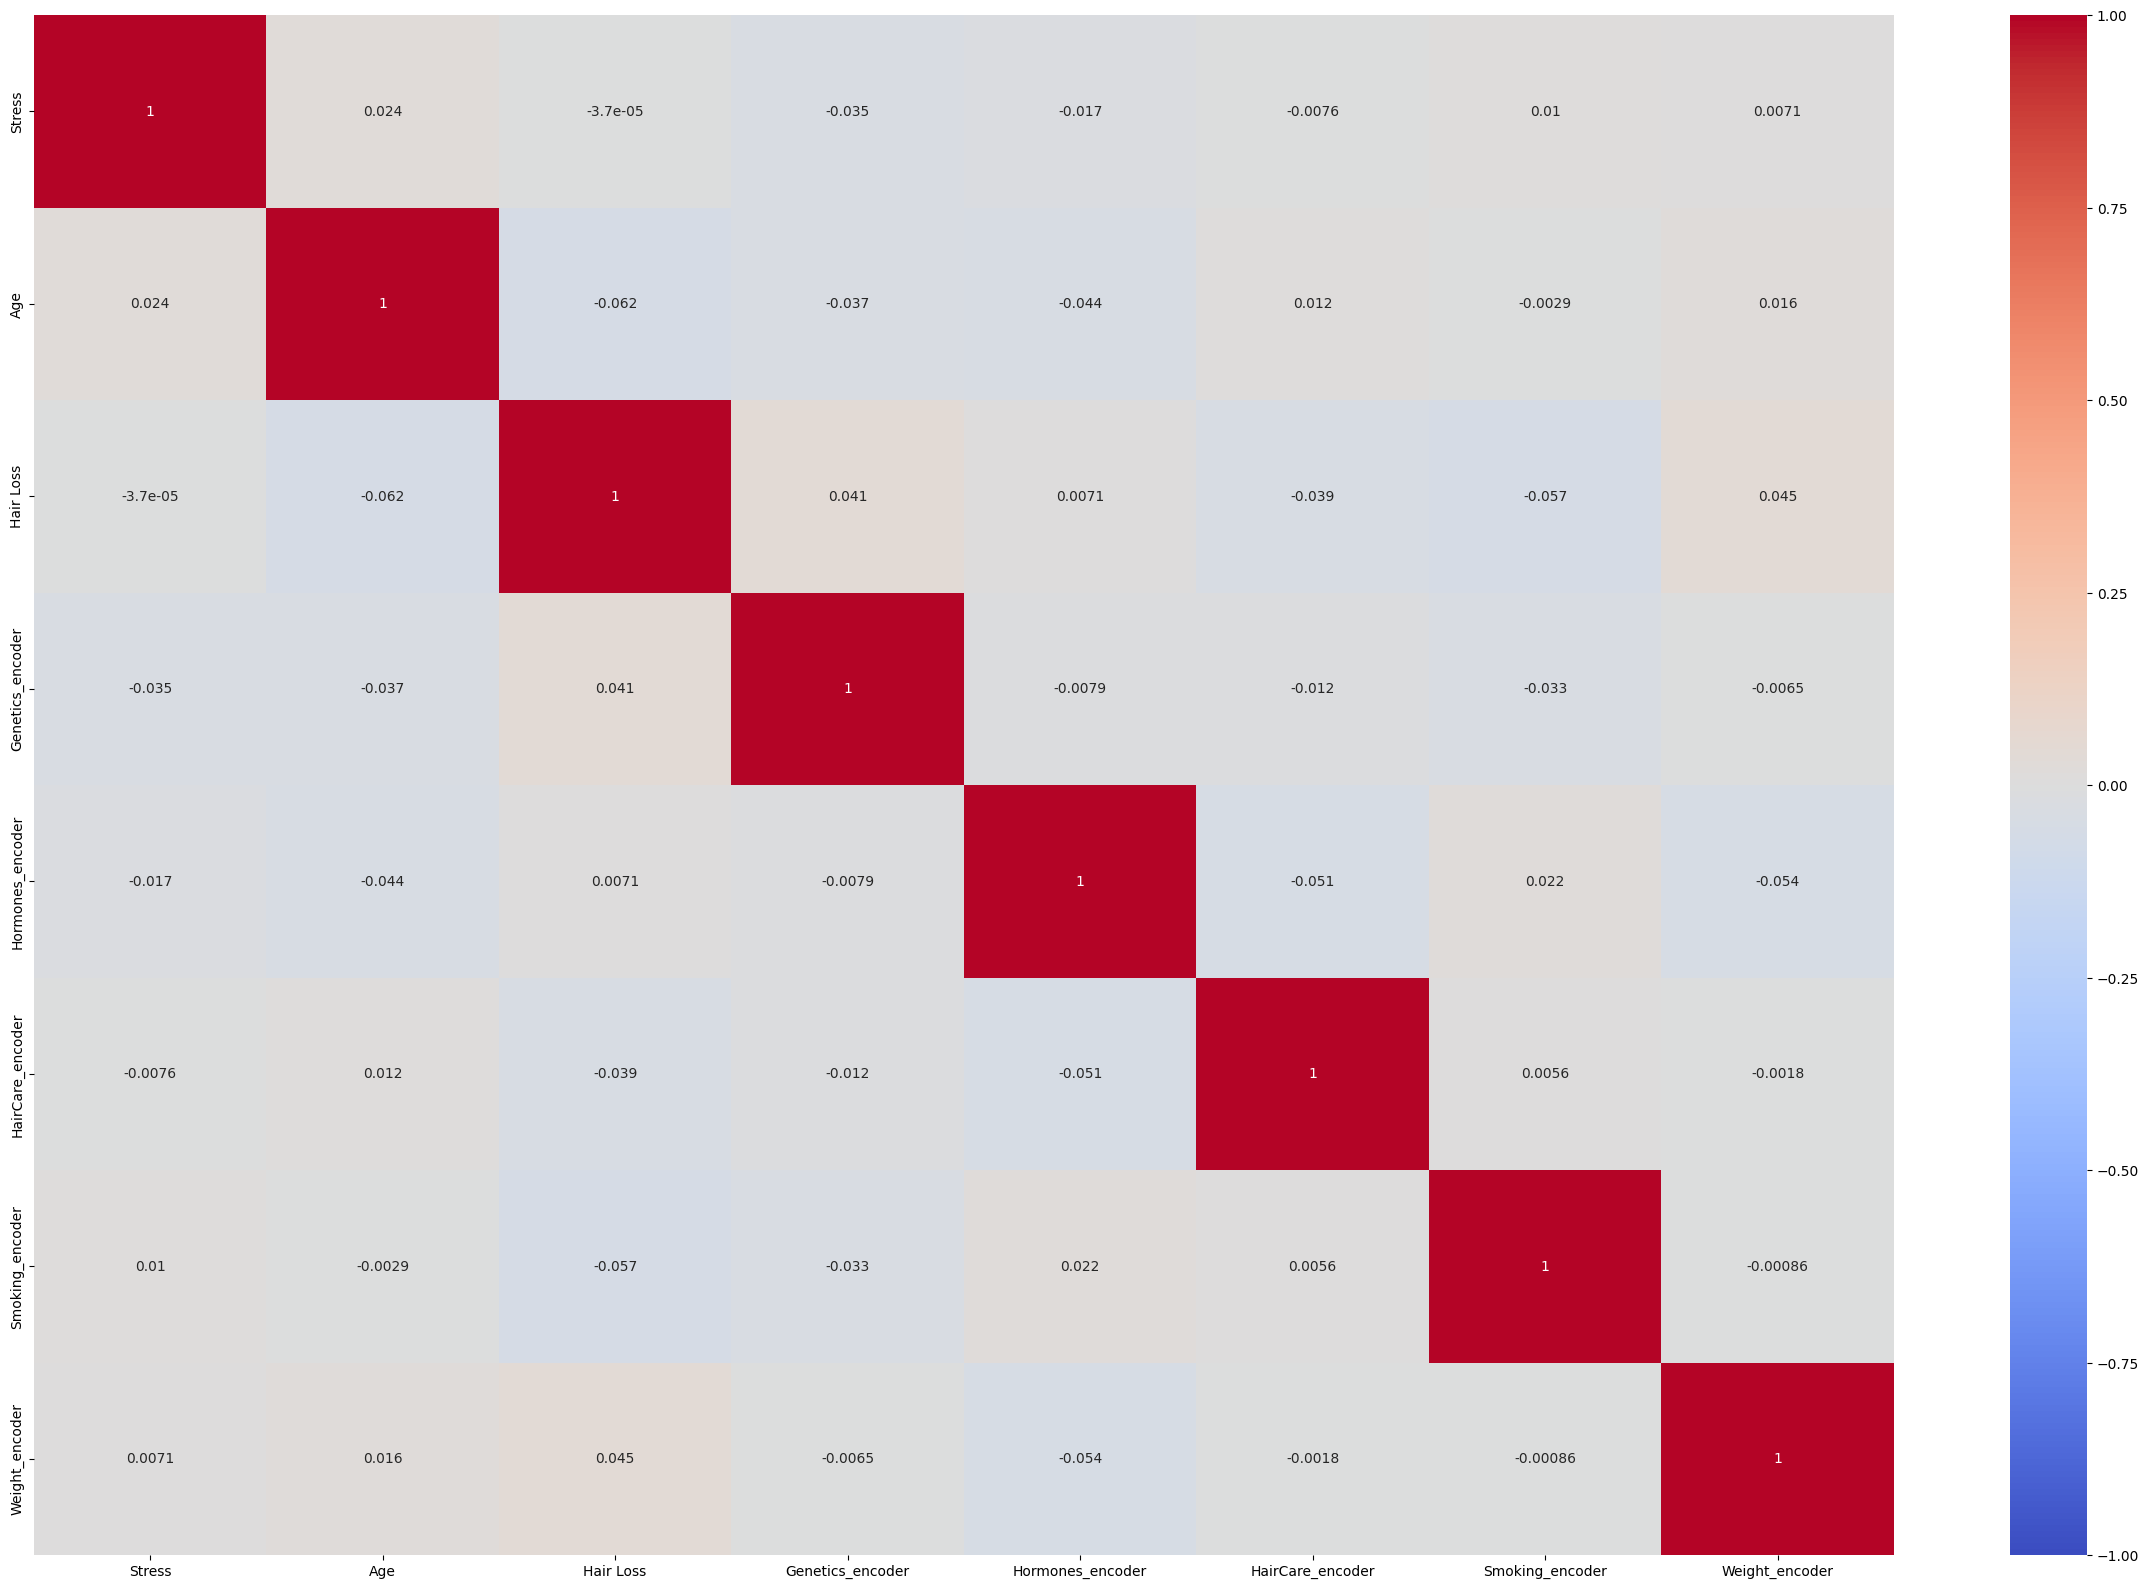

In [5]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

In [33]:
"""sns.pairplot(df, hue = "Hair Loss")"""

'sns.pairplot(df, hue = "Hair Loss")'

## MODELO

### Train test split

In [7]:
X = df.drop(columns = ["Hair Loss"])
y = df["Hair Loss"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 7)
(799,)
(200, 7)
(200,)


### Standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled["Age"] = scaler.fit_transform(X_train[["Age"]])

X_test_scaled = X_test.copy()
X_test_scaled["Age"] = scaler.transform(X_test[["Age"]])


### Entrenar y predecir

In [10]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0])

### Evaluación

In [12]:
#CONFUSSION MATRIX:

confusion_matrix(y_test, y_pred)

array([[56, 52],
       [43, 49]])

In [13]:
#PROBA:

y_proba = model.predict_proba(X_test_scaled)
print(y_proba[:5])  # Probabilidades de las primeras 5 muestras


[[0.46761525 0.53238475]
 [0.54830091 0.45169909]
 [0.51575566 0.48424434]
 [0.46600759 0.53399241]
 [0.49228402 0.50771598]]


In [14]:
#ACCURACY:

accuracy_score(y_test, y_pred)

0.525

<Axes: >

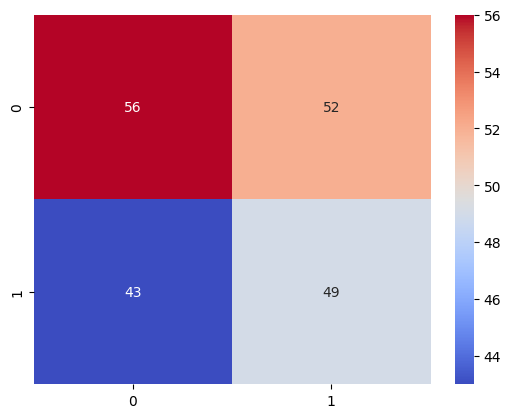

In [15]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap = "coolwarm",annot= True)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       108
           1       0.49      0.53      0.51        92

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.53       200



<Axes: >

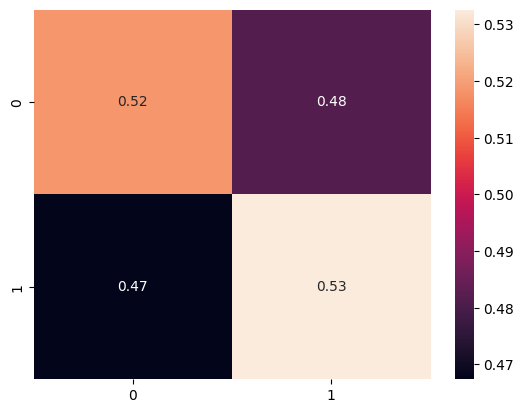

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize= "true"), annot= True)

In [18]:
model.score(X_test_scaled, y_test)


0.525

In [19]:
#ROC CURVE:
roc_auc_score(y_test, y_pred)

np.float64(0.5255636070853462)

In [20]:
pred_proba = model.predict_proba(X_test_scaled)
pred_proba

array([[0.46761525, 0.53238475],
       [0.54830091, 0.45169909],
       [0.51575566, 0.48424434],
       [0.46600759, 0.53399241],
       [0.49228402, 0.50771598],
       [0.38629246, 0.61370754],
       [0.46296426, 0.53703574],
       [0.40461591, 0.59538409],
       [0.51776327, 0.48223673],
       [0.51733196, 0.48266804],
       [0.41320276, 0.58679724],
       [0.48411367, 0.51588633],
       [0.62262548, 0.37737452],
       [0.5534809 , 0.4465191 ],
       [0.45359845, 0.54640155],
       [0.52699644, 0.47300356],
       [0.5074197 , 0.4925803 ],
       [0.48152878, 0.51847122],
       [0.51145534, 0.48854466],
       [0.50698638, 0.49301362],
       [0.48064834, 0.51935166],
       [0.5143256 , 0.4856744 ],
       [0.46224198, 0.53775802],
       [0.40744239, 0.59255761],
       [0.44685378, 0.55314622],
       [0.56433739, 0.43566261],
       [0.51971918, 0.48028082],
       [0.50838767, 0.49161233],
       [0.56061147, 0.43938853],
       [0.46201749, 0.53798251],
       [0.

In [21]:
fpr, tpr, t = roc_curve(y_test, pred_proba[:,1])

Text(0, 0.5, 'verdaderos positivos')

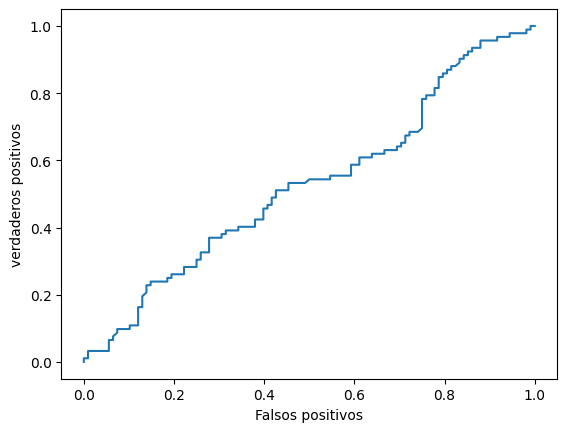

In [22]:
plt.plot(fpr, tpr)
plt.xlabel("Falsos positivos")
plt.ylabel("verdaderos positivos")

Text(0, 0.5, 'recall')

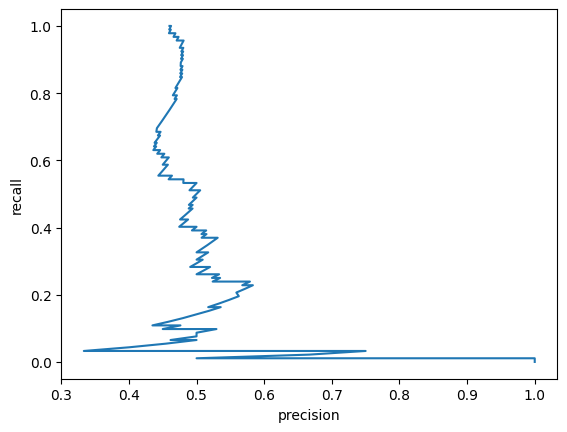

In [23]:
#P-R CURVE
precision, recall, t = precision_recall_curve(y_test, pred_proba[:,1])

plt.plot(precision, recall)

plt.xlabel("precision")
plt.ylabel("recall")


## PKL

In [24]:
import pickle
#guardar modelo
with open("../models/M1B_LR.pkl", "wb") as f:
    pickle.dump(model, f)
    
#guardar scaler
with open("../models/M1B_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)




In [25]:
# CARGAR el scaler
with open("../models/M1B_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# CARGAR el modelo
with open("../models/M1B_LR.pkl", "rb") as f:
    model = pickle.load(f)

X_test_scaled = X_test.copy()
X_test_scaled["Age"] = scaler.transform(X_test[["Age"]])


In [26]:
# HACER PREDICCIONES
y_pred = model.predict(X_test_scaled)